# libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import FunctionTransformer,StandardScaler,OrdinalEncoder
from sklearn.pipeline import make_pipeline ,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pickle

# Explorindg data

In [2]:
data=pd.read_csv("./Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000



# cleaning data

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.drop(columns=["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [9]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
matrix_cor=data.corr(method = 'pearson')
matrix_cor[["CreditScore", "Balance", "EstimatedSalary"]]

C:\Users\Dell\AppData\Local\Temp\ipykernel_8744\4086971059.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_cor=data.corr(method = 'pearson')


,CreditScore,Balance,EstimatedSalary
CreditScore,1.000000,0.006268,-0.001384
Age,-0.003965,0.028308,-0.007201
Tenure,0.000842,-0.012254,0.007784
Balance,0.006268,1.000000,0.012797
NumOfProducts,0.012238,-0.304180,0.014204
HasCrCard,-0.005458,-0.014858,-0.009933
IsActiveMember,0.025651,-0.010084,-0.011421
EstimatedSalary,-0.001384,0.012797,1.000000
Exited,-0.027094,0.118533,0.012097


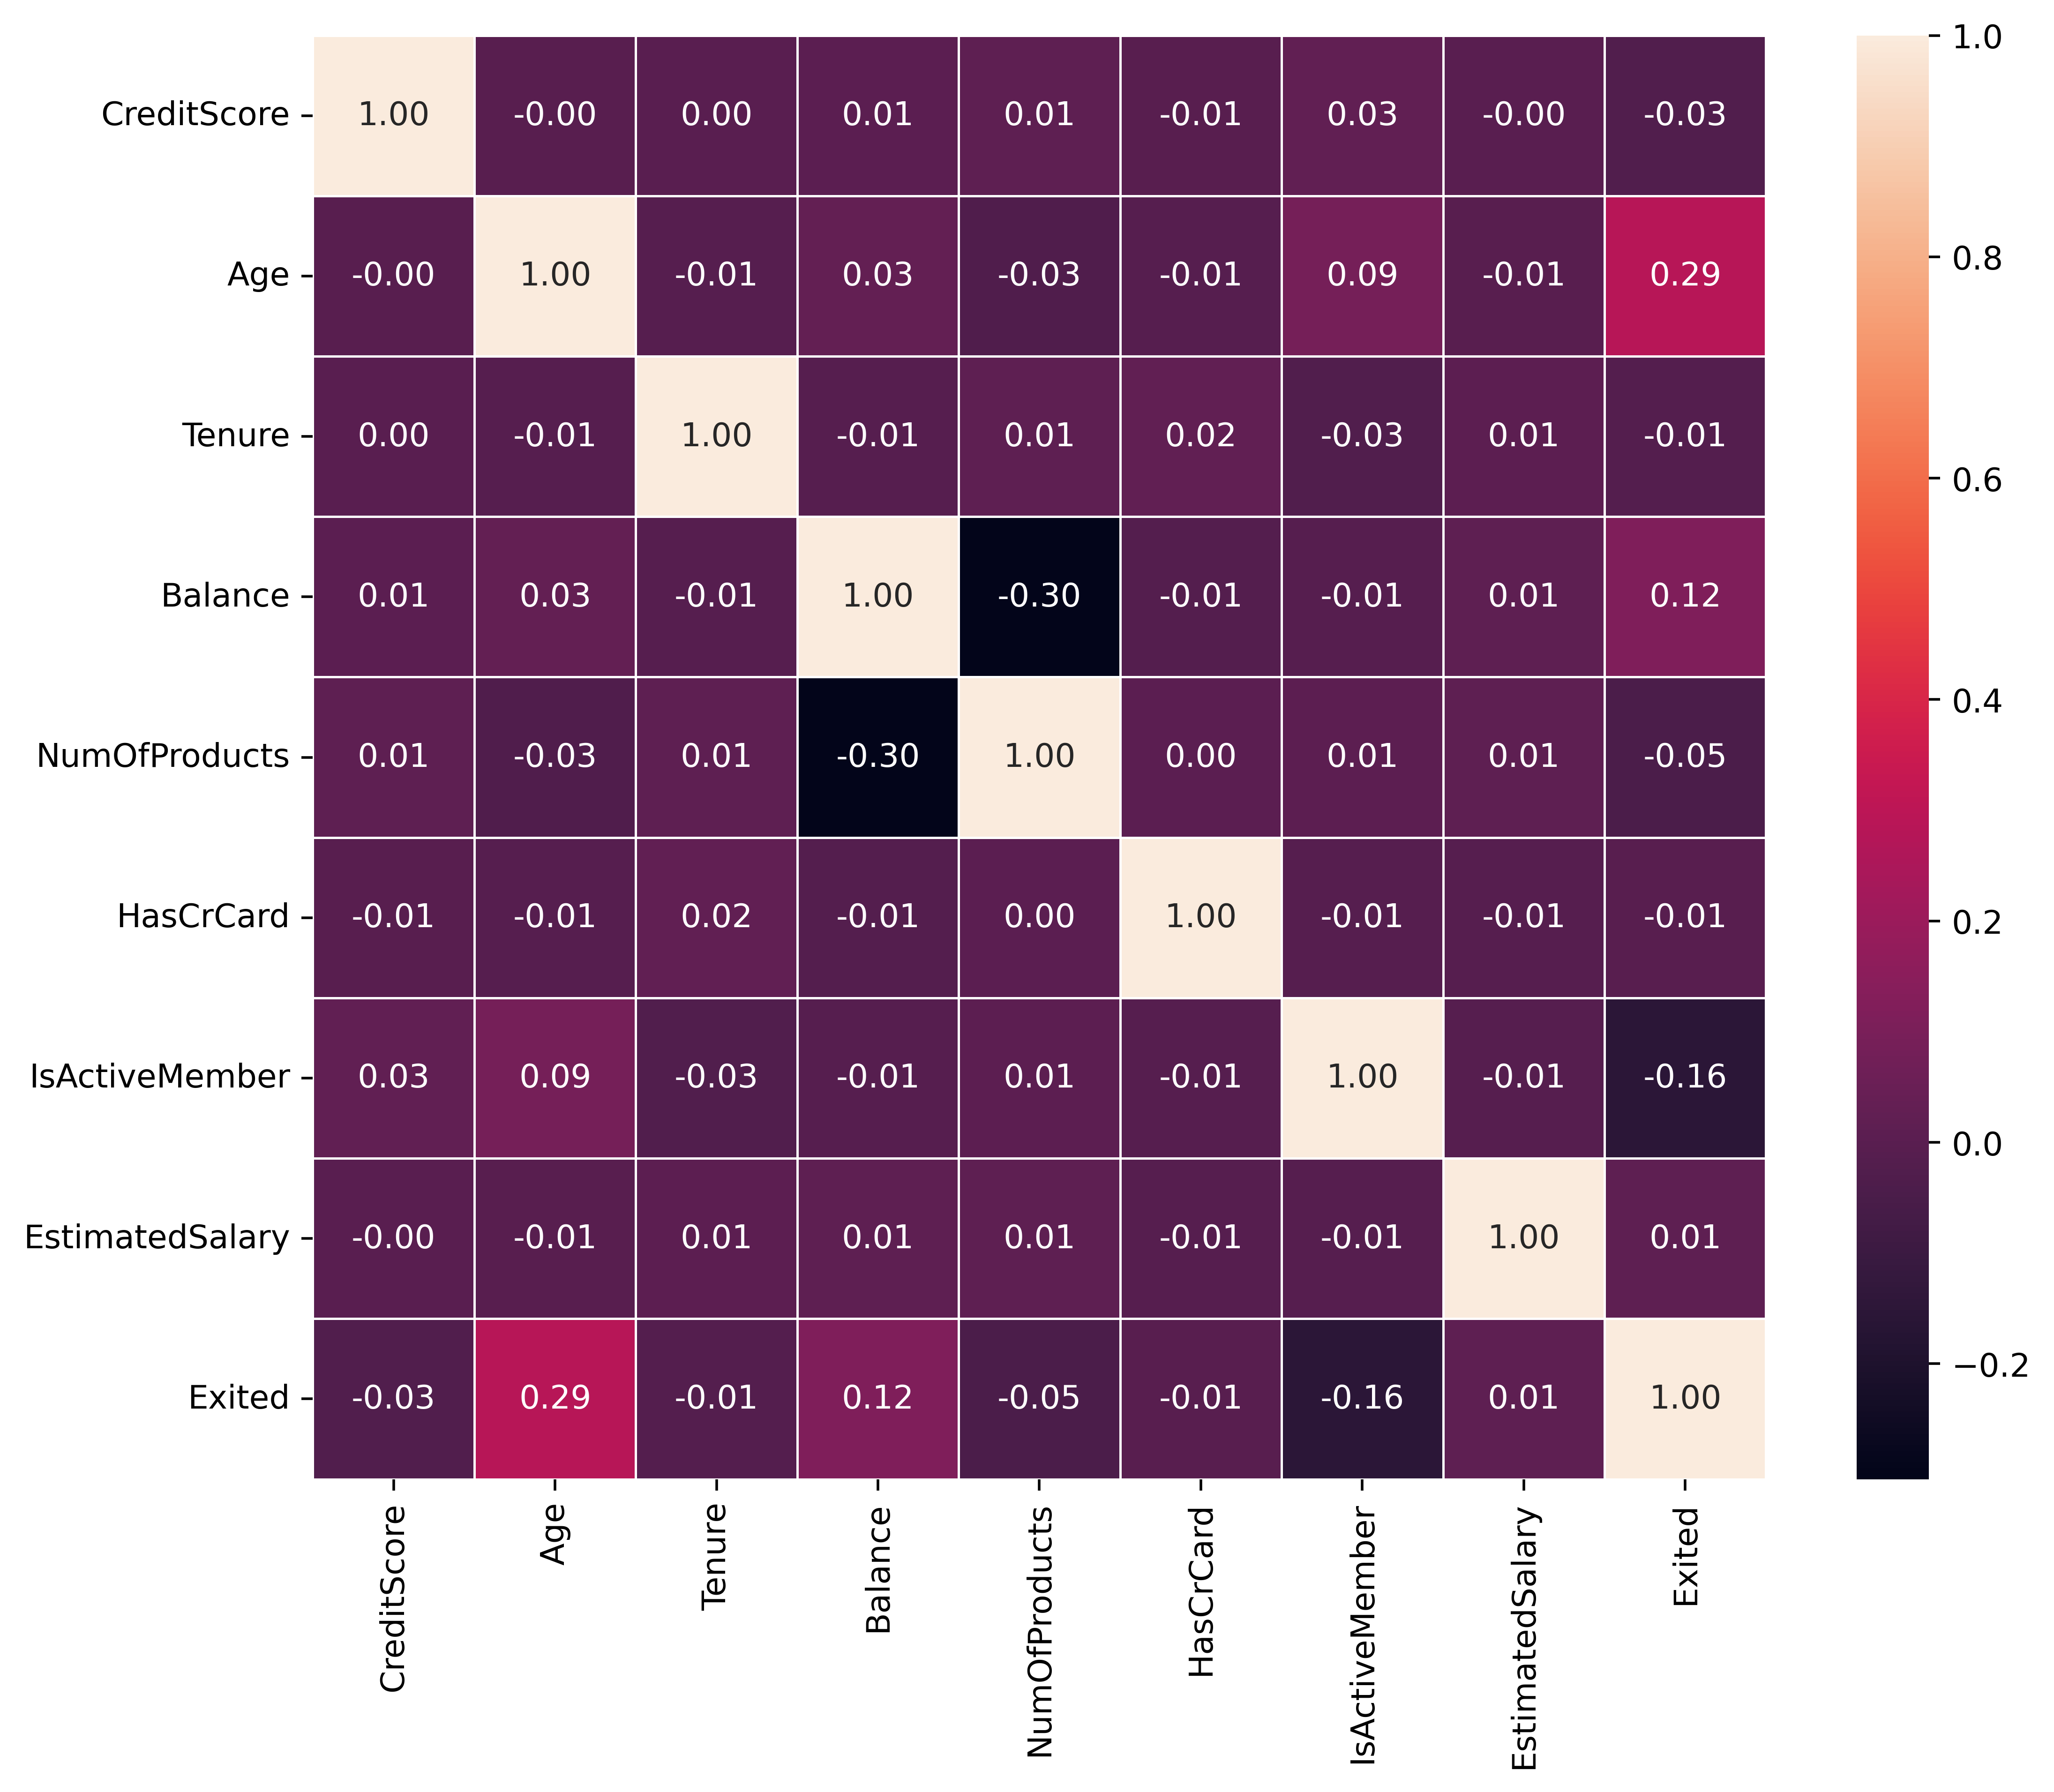

In [11]:
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(matrix_cor,annot=True,fmt=".2f", linewidth=.5)
plt.show()

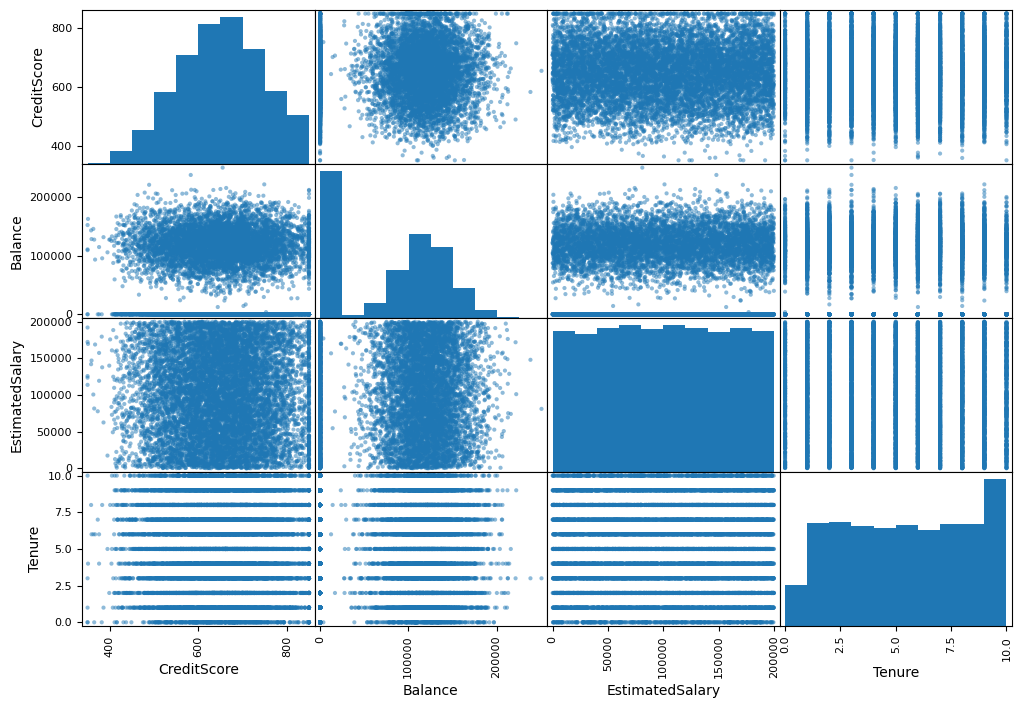

In [12]:
attributes = ["CreditScore", "Balance", "EstimatedSalary","Tenure"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

# Visualizing data

# Destribution of Exited

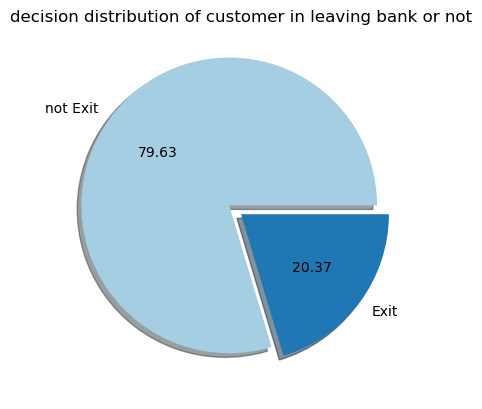

In [13]:
# distribution of 
mylabels = ["not Exit", "Exit"]
explode = (0.1, 0)
plt.pie(data["Exited"].value_counts(), labels = mylabels,colors=sns.color_palette("Paired"), shadow = True,autopct="%.02f",labeldistance=1.1,explode=explode)
plt.title("decision distribution of customer in leaving bank or not")
plt.show()

# 1-CreditScore

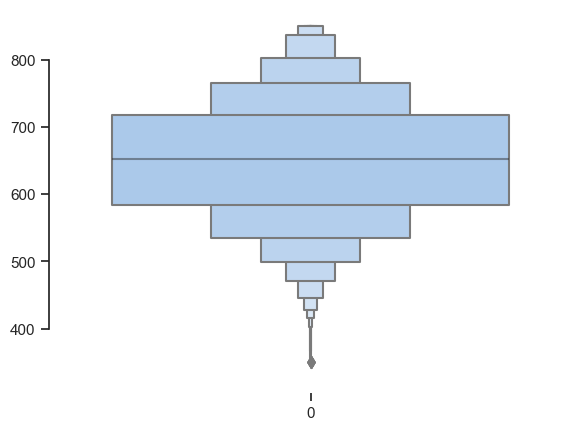

In [14]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxenplot(data=data["CreditScore"], palette=["b"])
sns.despine(offset=10, trim=True)

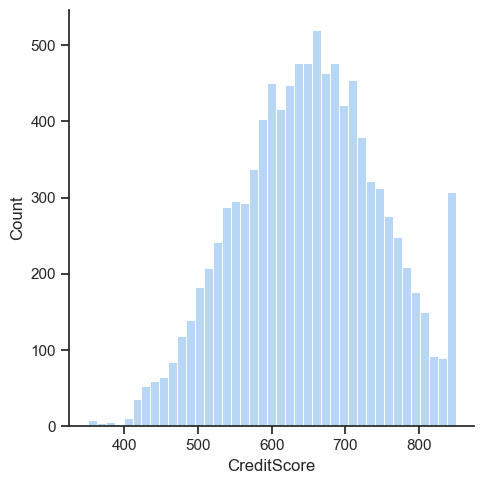

In [15]:
sns.displot(data["CreditScore"])

<Axes: xlabel='Exited', ylabel='CreditScore'>

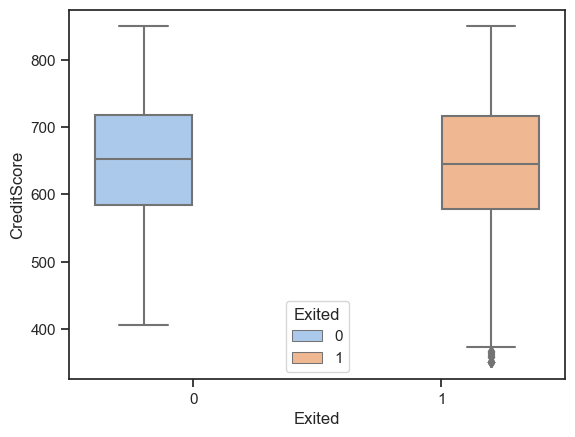

In [16]:
# CreditScore Distribution for the two classes
sns.boxplot(data=data, x="Exited", y="CreditScore", hue="Exited")

# Geography Analysis

In [17]:
data.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

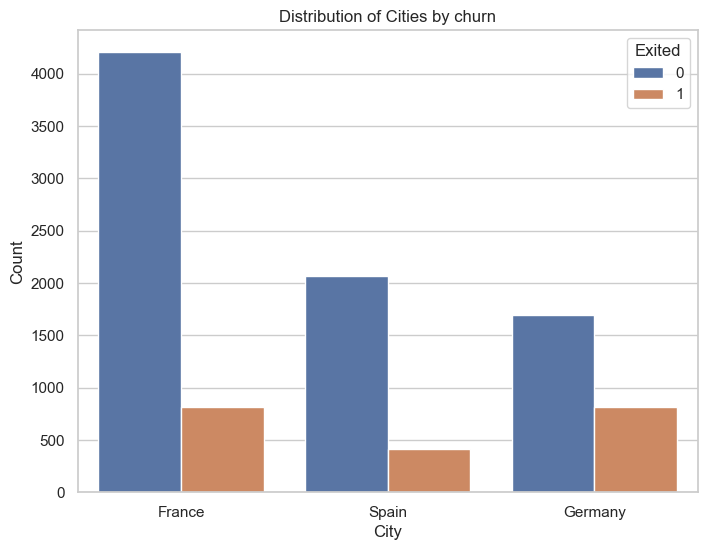

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Geography", hue="Exited")
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Cities by churn')
plt.show()


# Gender and Age Analysis


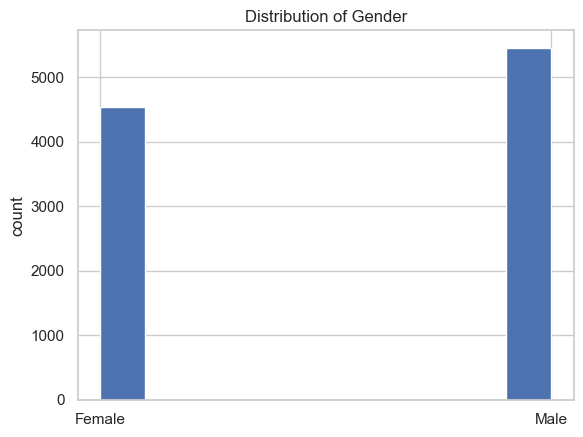

In [19]:
plt.title("Distribution of Gender")
data.Gender.hist()
plt.ylabel("count")
plt.show()

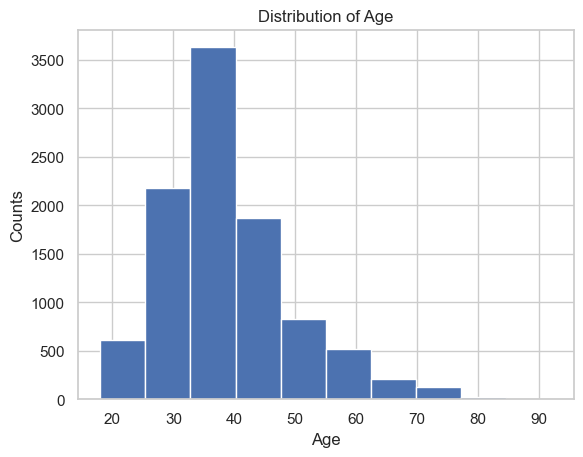

In [20]:
plt.title("Distribution of Age")
data.Age.hist()
plt.ylabel('Counts')
plt.xlabel('Age')
plt.show()

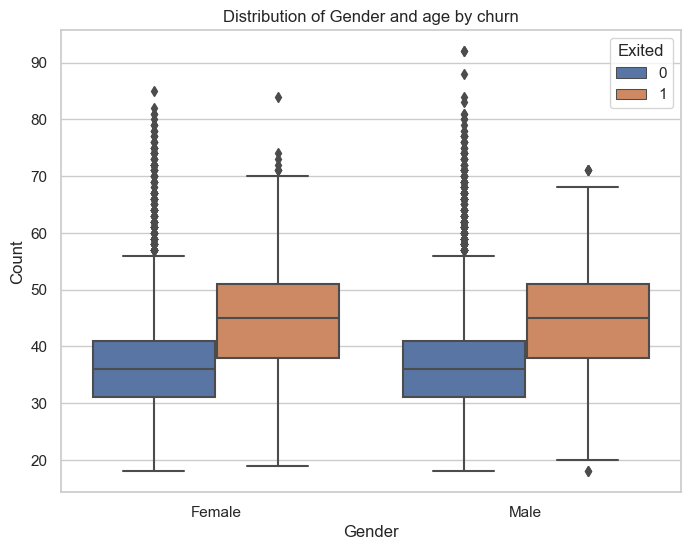

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="Gender", y="Age", hue="Exited")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender and age by churn')
plt.show()

# Tenure Analyisis

<Axes: >

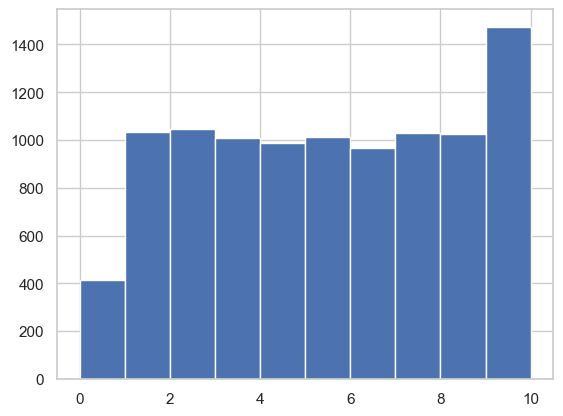

In [22]:
data.Tenure.hist()

In [23]:
data.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

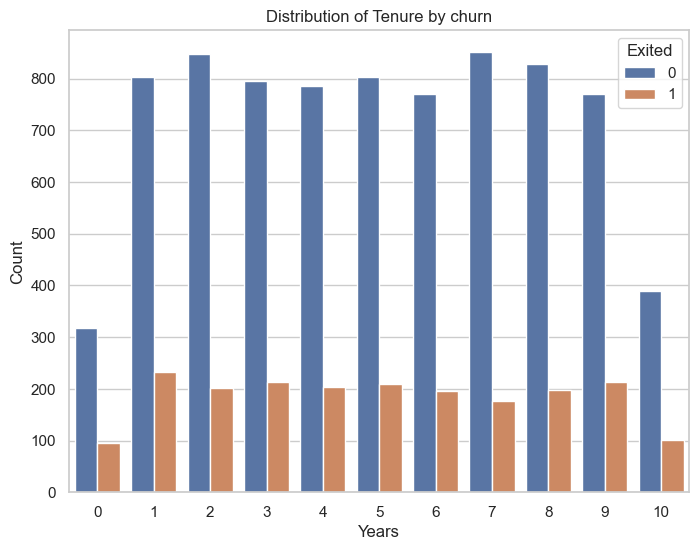

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Tenure", hue="Exited")
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Distribution of Tenure by churn')
plt.show()

# Balance Analysis

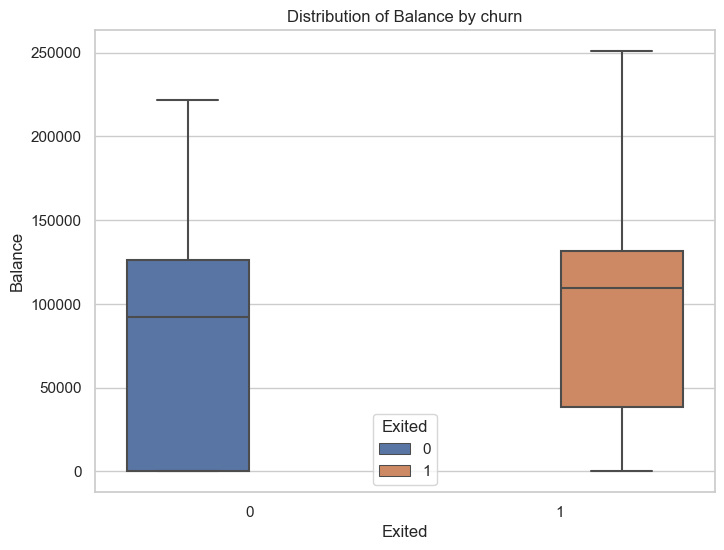

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="Exited", y="Balance", hue="Exited")

plt.ylabel('Balance')
plt.title('Distribution of Balance by churn')
plt.show()

# NumOfProducts Analysis

In [26]:
data.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

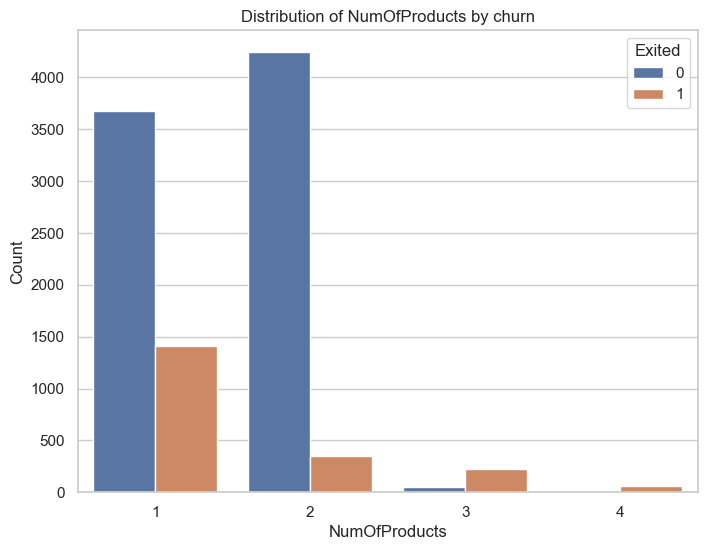

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="NumOfProducts", hue="Exited")
plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.title('Distribution of NumOfProducts by churn')
plt.show()

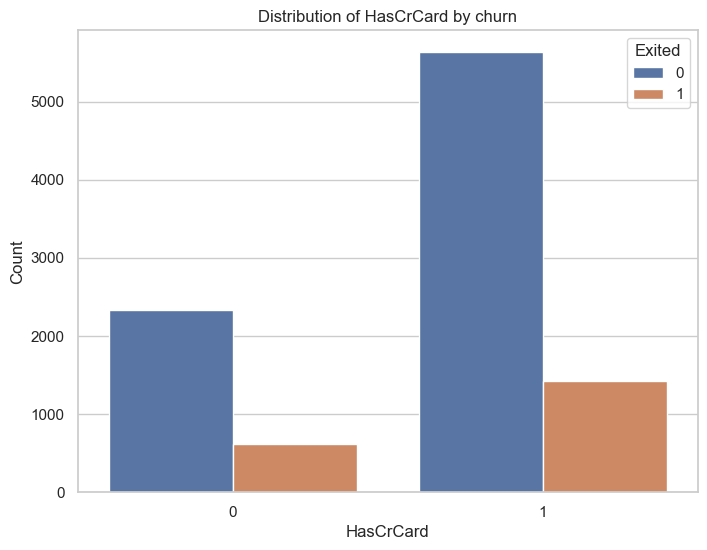

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="HasCrCard", hue="Exited")
plt.xlabel('HasCrCard')
plt.ylabel('Count')
plt.title('Distribution of HasCrCard by churn')
plt.show()

# IsActiveMember analysis 

In [29]:
data.groupby("IsActiveMember").sum()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8744\1312258834.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("IsActiveMember").sum()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
IsActiveMember,,,,,,,,
0,3142024,184252,24717,3.740246e+08,7392,3448,4.886202e+08,1302
1,3363264,204966,25411,3.908343e+08,7910,3607,5.122822e+08,735


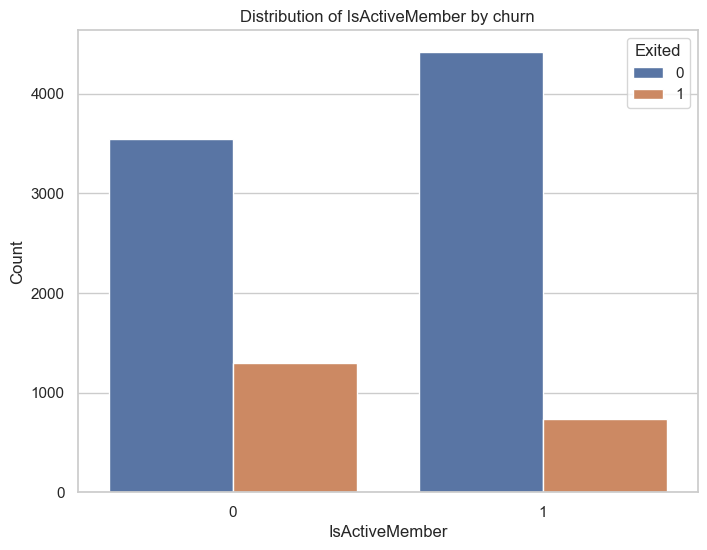

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="IsActiveMember", hue="Exited")
plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.title('Distribution of IsActiveMember by churn')
plt.show()

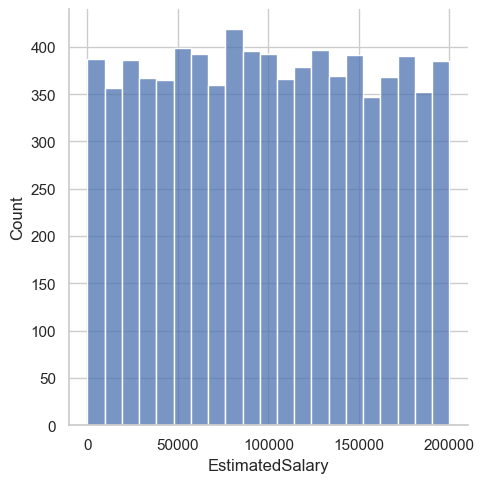

In [31]:
sns.displot(data.query("Exited==0")["EstimatedSalary"])

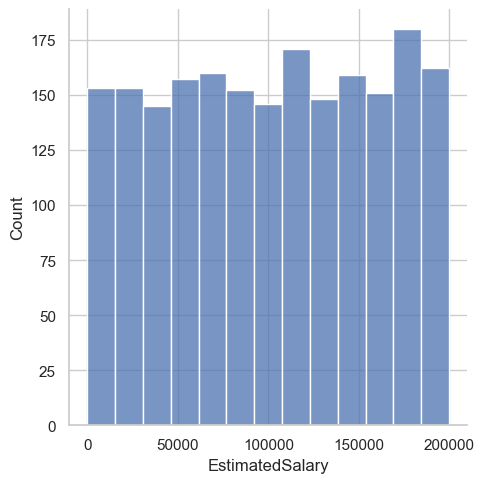

In [32]:
sns.displot(data.query("Exited==1")["EstimatedSalary"])

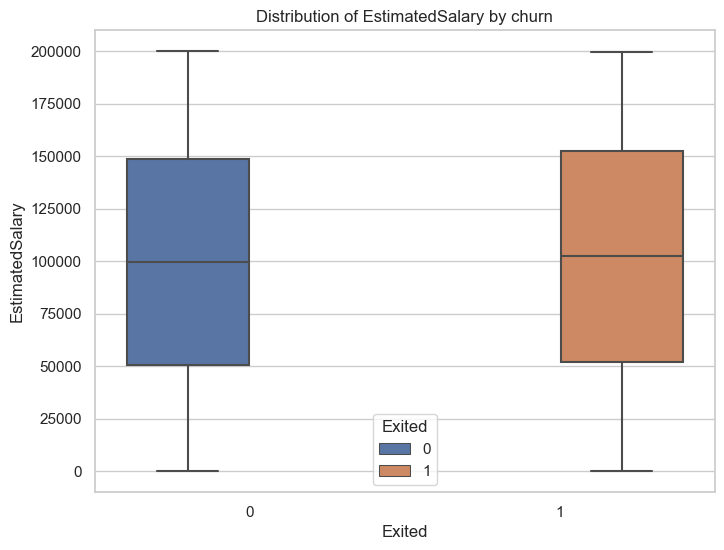

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="Exited", y="EstimatedSalary", hue="Exited")

plt.ylabel('EstimatedSalary')
plt.title('Distribution of EstimatedSalary by churn')
plt.show()

# Prepare the Data for Machine Learning Algorithms

## Handling Text and Categorical Attributes

In [34]:
cat_pre = OrdinalEncoder()  

cat_pre.fit_transform(data[["Gender"]])

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

# Feature Scaling and Transformation

In [35]:
log_pipeline = make_pipeline(
 FunctionTransformer(np.log, feature_names_out="one-to-one"),
 StandardScaler())


In [36]:
sqrt_pipeline = make_pipeline(
 FunctionTransformer(np.sqrt, feature_names_out="one-to-one"),
 StandardScaler())

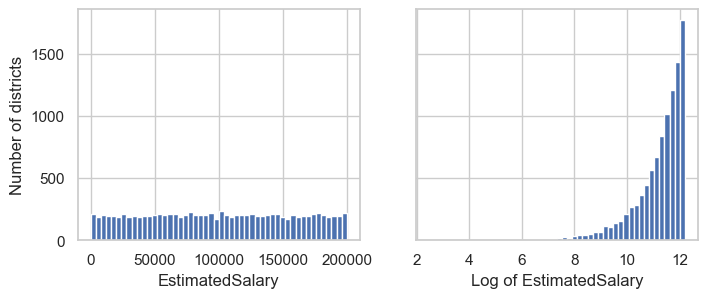

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
data["EstimatedSalary"].hist(ax=axs[0], bins=50)
data["EstimatedSalary"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("EstimatedSalary")
axs[1].set_xlabel("Log of EstimatedSalary")
axs[0].set_ylabel("Number of districts")
plt.show()

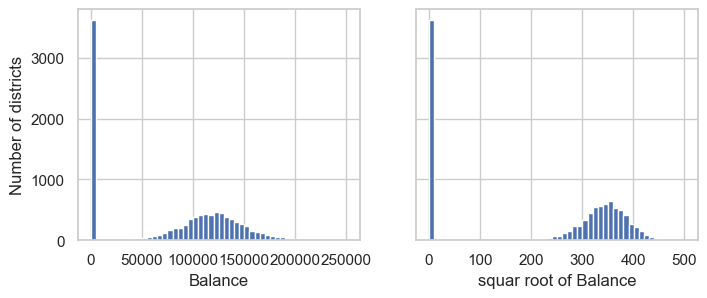

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
data["Balance"].hist(ax=axs[0], bins=50)
data["Balance"].apply(np.sqrt).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Balance")
axs[1].set_xlabel("squar root of Balance")
axs[0].set_ylabel("Number of districts")
plt.show()

In [39]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [40]:
preprocessing=ColumnTransformer([("cat",cat_pre,["Geography","Gender"]),("log",log_pipeline,["EstimatedSalary"]),("sqrt",sqrt_pipeline,["Balance","CreditScore"])],remainder=StandardScaler())

In [41]:
preprocessing.fit_transform(data)


array([[ 0.        ,  0.        ,  0.3178705 , ...,  0.64609167,
         0.97024255,  1.97716468],
       [ 2.        ,  0.        ,  0.42259444, ..., -1.54776799,
         0.97024255, -0.50577476],
       [ 0.        ,  0.        ,  0.43485625, ...,  0.64609167,
        -1.03067011,  1.97716468],
       ...,
       [ 0.        ,  0.        , -0.56066701, ..., -1.54776799,
         0.97024255,  1.97716468],
       [ 1.        ,  1.        ,  0.23073409, ...,  0.64609167,
        -1.03067011,  1.97716468],
       [ 0.        ,  0.        , -0.65774202, ...,  0.64609167,
        -1.03067011, -0.50577476]])

In [42]:
preprocessing.get_feature_names_out()

array(['cat__Geography', 'cat__Gender', 'log__EstimatedSalary',
       'sqrt__Balance', 'sqrt__CreditScore', 'remainder__Age',
       'remainder__Tenure', 'remainder__NumOfProducts',
       'remainder__HasCrCard', 'remainder__IsActiveMember',
       'remainder__Exited'], dtype=object)

# Select and Train a Model

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(data.drop("Exited",axis=1),data.Exited,test_size=.2,shuffle=True,stratify=data.Exited)

# 1- Decision tree

In [44]:
decision_tree=make_pipeline(preprocessing,DecisionTreeClassifier(criterion="entropy",max_depth=10))
decision_tree.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Geography', 'Gender']),
                                                 ('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EstimatedSalary']),
                                                 ('sqrt',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'sqrt'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Balance',
                                                   'CreditScore'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10))])

In [45]:
prediction=decision_tree.predict(xtrain)

In [46]:
confusion_matrix(ytrain,prediction)

array([[6132,  238],
       [ 601, 1029]], dtype=int64)

In [47]:
precision_score(ytrain,prediction)

0.8121546961325967

In [48]:
recall_score(ytrain,prediction)

0.6312883435582822

# 2- Random Forests

In [49]:
random_forest=make_pipeline(preprocessing,RandomForestClassifier(n_estimators=55,criterion="entropy",bootstrap=True,max_samples=180))
random_forest.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Geography', 'Gender']),
                                                 ('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EstimatedSalary']),
                                                 ('sqrt',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'sqrt'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Balance',
                                                   'CreditScore'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_samples=180,
                                        n_estimators=55))])

In [50]:
prediction=random_forest.predict(xtrain)

In [51]:
confusion_matrix(ytrain,prediction)

array([[6279,   91],
       [1111,  519]], dtype=int64)

In [52]:
precision_score(ytrain,prediction)

0.8508196721311475

In [53]:
recall_score(ytrain,prediction)

0.3184049079754601

# 3- Support Vector Machines

In [ ]:
SVM=make_pipeline(preprocessing,SVC(kernel='linear',C=5000))
SVM.fit(xtrain,ytrain)

In [ ]:
prediction=SVM.predict(xtrain)

In [ ]:
confusion_matrix(ytrain,prediction)

# 4-Knearest neighbors

In [ ]:
kNN=make_pipeline(preprocessing,KNeighborsClassifier(n_neighbors=3))
kNN.fit(xtrain,ytrain)

In [ ]:
prediction=kNN.predict(xtrain)

In [ ]:
confusion_matrix(ytrain,prediction)

In [ ]:
precision_score(ytrain,prediction)

In [ ]:
recall_score(ytrain,prediction)

In [ ]:
f1_score(ytrain,prediction)

# 5-Logistic regression

In [ ]:
logistic=make_pipeline(preprocessing,LogisticRegression(solver='sag',max_iter=2000,multi_class='ovr',fit_intercept=False))
logistic.fit(xtrain,ytrain)

In [ ]:
prediction=logistic.predict(xtrain)

In [ ]:
confusion_matrix(ytrain,prediction)

In [ ]:
precision_score(ytrain,prediction)

In [ ]:
recall_score(ytrain,prediction)

# 6- Neural network

In [ ]:
RNN=make_pipeline(preprocessing,MLPClassifier(hidden_layer_sizes=(200,250),activation="relu",learning_rate_init=.09,batch_size=60,learning_rate='constant',solver='sgd',max_iter=200,alpha=0.1))
RNN.fit(xtrain,ytrain)

In [ ]:
prediction=RNN.predict(xtrain)

In [ ]:
confusion_matrix(ytrain,prediction)

In [ ]:
precision_score(ytrain,prediction)

In [ ]:
recall_score(ytrain,prediction)

In [ ]:
f1_score(ytrain,prediction)

# Evaluation Using Cross-Validation

In [ ]:
eval_decisionTree=cross_val_score(decision_tree,xtrain,ytrain,cv=10,scoring='f1')

In [ ]:
eval_decisionTree

In [ ]:
eval_randomForest=cross_val_score(random_forest,xtrain,ytrain,cv=10,scoring='f1')

In [ ]:
eval_randomForest

In [ ]:
eval_knn=cross_val_score(kNN,xtrain,ytrain,cv=10,scoring='f1')
eval_knn

In [ ]:
eval_rnn=cross_val_score(RNN,xtrain,ytrain,cv=3,scoring='f1')

In [ ]:
eval_rnn

# Fine-Tune Models

# Randomized Search

In [ ]:
param_distribs = {"mlpclassifier__learning_rate_init":np.arange(0.05,1,0.01),'mlpclassifier__max_iter': np.arange(84,1000,10),"mlpclassifier__alpha":np.arange(.1,1,.1),"mlpclassifier__batch_size":np.arange(10,200,10)}
rnd_search = RandomizedSearchCV(RNN, param_distributions=param_distribs, n_iter=10, cv=3,scoring='f1', random_state=42)
rnd_search.fit(xtrain, ytrain)


In [ ]:
rnd_search.best_estimator_

In [ ]:
RNN=make_pipeline(preprocessing,MLPClassifier(alpha=0.1, batch_size=160, hidden_layer_sizes=(200, 250),
              learning_rate_init=0.14, max_iter=124, solver='sgd'))
RNN.fit(xtrain,ytrain)

# Evaluate System on the Test Set


In [ ]:
test_pre=RNN.predict(xtest)
f1_score(ytest,test_pre)

# Saving the training model

In [ ]:
with open("model.pkl", "wb") as f:
    pickle.dump(RNN,f)